In [1]:
from scipy.optimize import curve_fit
from scipy.stats import linregress
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('3_4_Thermocouple Calibration_Data.csv', delimiter=',')
xdata = data['x (degree)']; ydata = data['y (V)']; sigma = data['sigma (V)']
result = linregress(xdata,ydata)
slope = result[0]; intercept = result[1]; 

In [3]:
def func(x,a,b,c):
    return a*x**2+b*x+c

popt, pcov = curve_fit(func, xdata, ydata, absolute_sigma=True, sigma= sigma, p0 = [0,slope, intercept])
err = np.sqrt(np.diag(pcov))
yval = func(xdata, popt[0], popt[1], popt[2])


Text(60, 0.3, 'start function: y = 0.043T+-1')

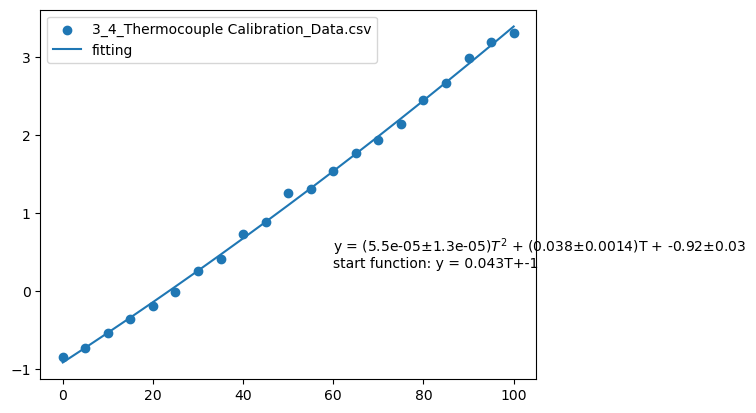

In [4]:
plt.scatter(xdata, ydata, label = "3_4_Thermocouple Calibration_Data.csv")
plt.plot(xdata, yval, label = 'fitting')
plt.legend()
plt.text(60,0.5, f'y = ({popt[0]:.2g}$\pm${err[0]:.2g}$)T^2$ + ({popt[1]:.2g}$\pm${err[1]:.2g})T + {popt[2]:.2g}$\pm${err[2]:.2g}')
plt.text(60,0.3, f'start function: y = {slope:.2g}T+{intercept:.2g}')

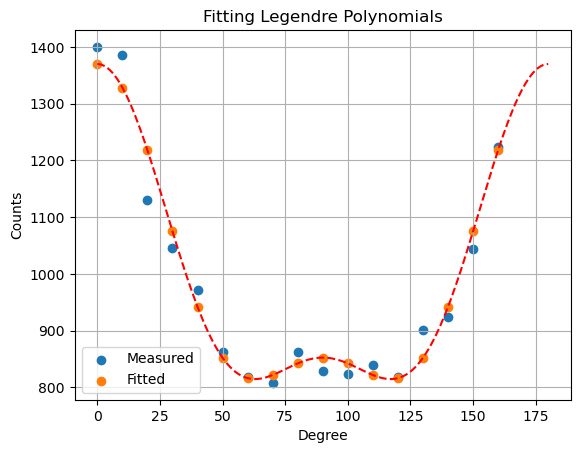

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import legendre
df = pd.read_csv('3_6_Legendre Polynomial Fit_data.csv')
df = df.iloc[0:17]
df['cos_Theta'] = np.cos(np.deg2rad(df['Theta']))
c,stats = legendre.legfit(df['cos_Theta'], df['Counts'],[0,2,4], full=True)

plt.title('Fitting Legendre Polynomials')
plt.xlabel('Degree')
plt.ylabel('Counts')

x = df['Theta']
y_measured = df['Counts']
plt.scatter(x,y_measured, label = 'Measured')
y_fitted = legendre.Legendre(c)(df['cos_Theta'])
plt.scatter(x,y_fitted, label = 'Fitted')
x_fit = np.linspace(0,180,181)
y_fit = legendre.Legendre(c)(np.cos(np.deg2rad(x_fit)))
plt.plot(x_fit, y_fit, 'r--')

plt.grid()
plt.legend()
plt.show()

In [15]:
df

,Theta,Counts,x,sigma,p0(x),p2(x),p4(x),beta1,beta2,beta3,...,alpha13,alpha21,alpha22,alpha23,alpha31,alpha32,alpha33,counts(expected),a2,a3
0,0.0,1400.0,1.000000e+00,37.416574,1.0,1.000000,1,1.0,1.000000,1,...,0.000714,0.000714,0.000714,0.000714,0.000714,0.000714,7.142860e-04,1361.320828,NaN,NaN
1,10.0,1386.0,9.848078e-01,37.229021,1.0,0.954769,0.853209499,1.0,0.954769,0.853209499,...,0.000616,0.000689,0.000658,0.000588,0.000616,0.000588,5.252280e-04,1321.110763,NaN,NaN
2,20.0,1130.0,9.396926e-01,33.615473,1.0,0.824533,0.474977736,1.0,0.824533,0.474977736,...,0.000420,0.000730,0.000602,0.000347,0.000420,0.000347,1.996490e-04,1213.936008,NaN,NaN
3,30.0,1045.0,8.660254e-01,32.326460,1.0,0.625000,0.0234375,1.0,0.625000,0.0234375,...,0.000022,0.000598,0.000374,0.000014,0.000022,0.000014,5.260000e-07,1074.513346,NaN,NaN
4,40.0,971.0,7.660444e-01,31.160873,1.0,0.380236,-0.319004346,1.0,0.380236,-0.319004346,...,-0.000329,0.000392,0.000149,-0.000125,-0.000329,-0.000125,1.048030e-04,944.437796,NaN,NaN
5,50.0,862.0,6.427876e-01,29.359837,1.0,0.119764,-0.427534458,1.0,0.119764,-0.427534458,...,-0.000496,0.000139,0.000017,-0.000059,-0.000496,-0.000059,2.120480e-04,855.571464,NaN,NaN
6,60.0,819.0,5.000000e-01,28.618176,1.0,-0.125000,-0.2890625,1.0,-0.125000,-0.2890625,...,-0.000353,-0.000153,0.000019,0.000044,-0.000353,0.000044,1.020230e-04,818.632942,NaN,NaN
7,70.0,808.0,3.420201e-01,28.425341,1.0,-0.324533,-0.003800041,1.0,-0.324533,-0.003800041,...,-0.000005,-0.000402,0.000130,0.000002,-0.000005,0.000002,1.790000e-08,821.904485,NaN,NaN
8,80.0,862.0,1.736482e-01,29.359837,1.0,-0.454769,0.265901611,1.0,-0.454769,0.265901611,...,0.000308,-0.000528,0.000240,-0.000140,0.000308,-0.000140,8.200000e-05,840.212908,NaN,NaN
9,90.0,829.0,6.130000e-17,28.792360,1.0,-0.500000,0.375,1.0,-0.500000,0.375,...,0.000452,-0.000603,0.000302,-0.000226,0.000452,-0.000226,1.696320e-04,849.560020,NaN,NaN
